In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# **Relationship Between Relationship Between Pregnancy-Associated Mortality and the Percentage of Students Receiving the Required Amount of PE Instruction**
## **Project Overview**

In my previous project, I found that smaller class sizes are often associated with higher participation in physical education (PE). However, this relationship remains unclear, as other factors, such as motivation to maintain good health, could also contribute to increased PE participation.

In this study, I aim to explore the relationship between the percentage of students receiving the required amount of PE instruction and the overall quality of basic healthcare services. For this purpose, I utilize Pregnancy-Associated Mortality (PAM) data across various boroughs. High levels of pregnancy-associated mortality often indicate inadequacies in healthcare systems.

**Hypothesis:**
Boroughs with higher Pregnancy-Associated Mortality rates will show a lower percentage of PE participation among students, as lower motivation to stay healthy may be prevalent in areas with less advanced healthcare systems.

Citation: [NYC open data | 2020-2021 Local Law 102 Physical Education](https://data.cityofnewyork.us/Education/2020-2021-Local-Law-102-Physical-Education/s47t-kwt5/about_data)
          [NYC open data | 2021 - 2022 Average Class Size by Borough](https://data.cityofnewyork.us/Health/Pregnancy-Associated-Mortality/27x4-cbi6)


## **1.Data Analysis:**
### **1. Read in the data_1.**
Load the file 'Physical_Education.csv' into a pandas DataFrame called books PE.

In [6]:
import pandas as pd
import numpy as np

PE = pd.read_csv('Physical_Education.csv', encoding='utf-8')
PE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Borough                                                       119 non-null    object 
 1   Category                                                      115 non-null    object 
 2   Average # of Students per PE Class                            5 non-null      float64
 3   Total # of students                                           115 non-null    float64
 4   Total # of students who received PE instruction in all terms  115 non-null    float64
 5   % of students who received PE instruction in all terms        115 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.7+ KB


### **2. Data Cleaning for data_1.**
1. For the numeric processing, replace the missing values to 'NaN'.

In [8]:
PE.replace("..", np.nan, inplace=True)


2. Select the columns needed for data visualization.

In [10]:
PE_participation = PE[["Borough", "% of students who received PE instruction in all terms"]]
PE_participation

,Borough,% of students who received PE instruction in all terms
0,Bronx,0.9721
1,Bronx,0.9963
2,Bronx,0.9957
3,Bronx,0.9974
4,Bronx,0.9976
...,...,...
114,Staten Island,0.9639
115,New York City Department of Education,NaN
116,Report on Physical Education in New York City ...,NaN
117,Physical Education Instruction District Level,NaN


3. Group the data by the "Borough" column and calculate the mean for each group.

In [12]:
PE_Borough = PE_participation.groupby('Borough').mean()
PE_Borough2= PE_Borough.dropna().reset_index()
PE_Borough2

,Borough,% of students who received PE instruction in all terms
0,Bronx,0.970170
1,Brooklyn,0.965478
2,Manhattan,0.964357
3,Queens,0.960565
4,Staten Island,0.965639


### **3. Read in the data_2.**
1. Load the file 'Pregnancy-Associated_Mortality.csv' into a pandas DataFrame called books Motality.

In [14]:
Mortality = pd.read_csv('Pregnancy-Associated_Mortality.csv', encoding='utf-8')


### **4. Data Cleaning in the data_2.**
1. For the numeric processing, replace the missing values to 'NaN'.

In [36]:
Mortality.replace("..", np.nan, inplace=True)
Mortality.columns = Mortality.columns.str.replace(" ", "")
Mortality.tail(30)

,Year,Related,Underlying_cause,Race/ethnicity,Borough,Deaths
206,2021,All,All,Latina,All,21.0
207,2021,All,All,Asian/Pacific Islander,All,7.0
208,2021,All,All,White non-Latina,All,5.0
209,2021,All,All,Other,All,2.0
210,2021,Pregnancy-associated but not related,Cancer,All,All,3.0
211,2021,Pregnancy-associated but not related,Mental Health Conditions (Overdose related to ...,All,All,3.0
212,2021,Pregnancy-associated but not related,Asthma/ pulmonary conditions,All,All,1.0
213,2021,Pregnancy-associated but not related,Cardiovascular Conditions,All,All,1.0
214,2021,Pregnancy-related,All,All,Bronx,6.0
215,2021,Pregnancy-related,All,All,Brooklyn,8.0


In [17]:
Mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              236 non-null    object 
 1   Related           236 non-null    object 
 2   Underlying_cause  236 non-null    object 
 3   Race/ethnicity    236 non-null    object 
 4   Borough           236 non-null    object 
 5   Deaths            235 non-null    float64
dtypes: float64(1), object(5)
memory usage: 11.2+ KB


In [18]:
Mortality.columns

Index(['Year', 'Related', 'Underlying_cause', 'Race/ethnicity', 'Borough',
       'Deaths'],
      dtype='object')

2. Select the columns required for data visualization, focusing on the year 2020 to align with the other data.

In [38]:
Mortality_total = Mortality[(Mortality['Year'] == '2020')][['Borough', 'Deaths']]
Mortality_total

,Borough,Deaths
160,Bronx,16.0
161,Brooklyn,14.0
162,Manhattan,3.0
163,Queens,11.0
164,Staten Island,2.0
165,Rest of State,5.0
166,All,8.0
167,All,13.0
168,All,23.0
169,All,6.0


3. Group the data by the "Borough" column and calculate the mean for each group.

In [40]:
Mortality_Borough = Mortality_total.groupby('Borough').mean()
Mortality_Borough

,Deaths
Borough,
All,4.851852
Bronx,12.500000
Brooklyn,11.000000
Manhattan,2.000000
Queens,9.500000
Rest of State,4.000000
Staten Island,2.000000


### **5. Integrate the data_1 and the data_2.**
Use the merge function to integrate data_1: PE_Borough2: Mortality_Borough based on the columns 'Borough'.

In [42]:
merged_data = pd.merge(PE_Borough2, Mortality_Borough, on = "Borough", how = "inner")
merged_data

,Borough,% of students who received PE instruction in all terms,Deaths
0,Bronx,0.970170,12.5
1,Brooklyn,0.965478,11.0
2,Manhattan,0.964357,2.0
3,Queens,0.960565,9.5
4,Staten Island,0.965639,2.0


### **6. Data visualization with plotly.**
1. Create line charts showing the ratio of P.E. attendance and Pregnancy-Associated_Mortality.
2. Define both sides of the y-axis to represent each value.
3. Display the line charts with data grouped by "Borough."
4. Add a title to the graph and label each axis.

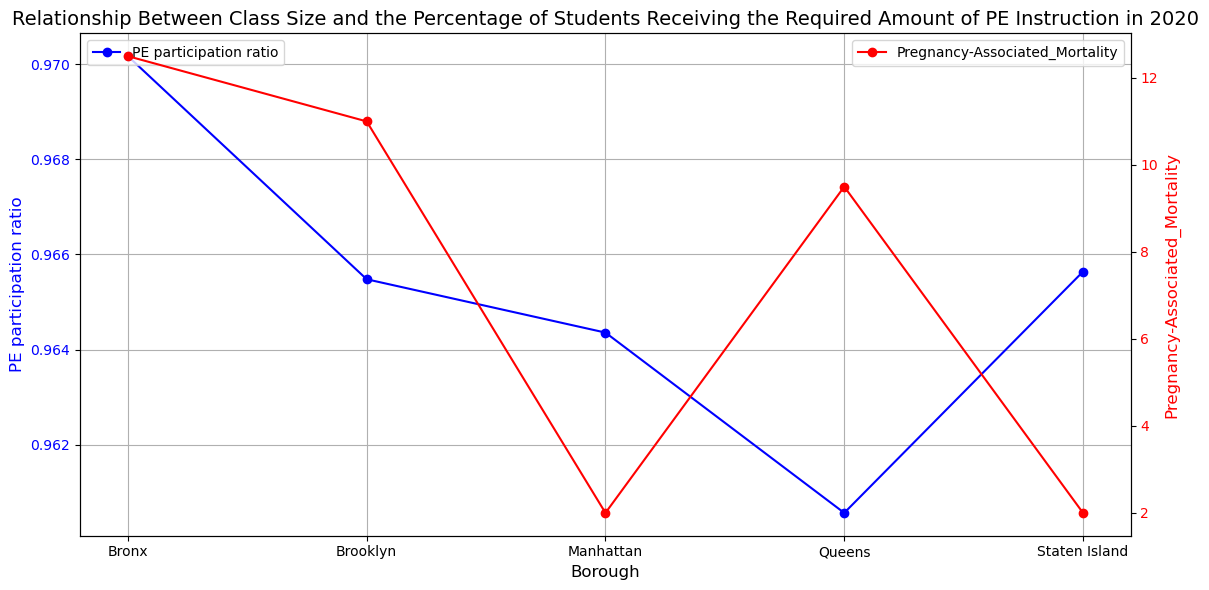

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(merged_data['Borough'], merged_data['% of students who received PE instruction in all terms'], label='PE participation ratio', color='blue', marker='o')

ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('PE participation ratio', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Relationship Between Class Size and the Percentage of Students Receiving the Required Amount of PE Instruction in 2020', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(merged_data['Borough'], merged_data['Deaths'], color='red', label='Pregnancy-Associated_Mortality',marker='o')
ax2.set_ylabel('Pregnancy-Associated_Mortality', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.subplots_adjust(right=0.8)

plt.tight_layout()
plt.show()


## **２. Conclusion**

The hypothesis shows a certain possibility of being correct. In boroughs other than the Bronx, there was a discrepancy between neonatal mortality rates and PE participation rates. However, the Bronx demonstrated the highest PE participation rate among all boroughs, indicating a greater concern for health, yet it also had a high neonatal mortality rate. This point warrants further investigation, such as examining year-to-year changes and searching for other factors contributing to the high neonatal mortality rate. This analysis suggests that improving the quality of the healthcare system may enhance the public's concern for health. By further researching the quality of the healthcare system, it may be possible to identify policies that allocate budgets to raise health awareness.